<a href="https://colab.research.google.com/github/AtharvaW29/College-Admission-Prediction-System/blob/main/PBLAISEM6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
# df = pd.read_csv('/content/Round2_JeeMain_Cutoff_2017-2022.csv')

# used for local machine
df = pd.read_csv('D:\College-Admission-Prediction-System\Round2_JeeMain_Cutoff_2017-2022.csv')
df = df.iloc[:,:7]
df

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,OPEN,Gender-Neutral,54131.0,67053.0
1,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,OPEN,Female-only (including Supernumerary),45890.0,70992.0
2,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,EWS,Gender-Neutral,10370.0,13354.0
3,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,EWS,Female-only (including Supernumerary),15448.0,15448.0
4,Dr. B R Ambedkar National Institute of Technol...,"Bio Technology (4 Years, Bachelor of Technology)",HS,OBC-NCL,Gender-Neutral,29569.0,49056.0
...,...,...,...,...,...,...,...
34694,University of Hyderabad,"Computer Science (5 Years, Integrated Master o...",AI,OPEN,NaN,8977.0,13893.0
34695,University of Hyderabad,"Computer Science (5 Years, Integrated Master o...",AI,OPEN (PwD),NaN,712.0,712.0
34696,University of Hyderabad,"Computer Science (5 Years, Integrated Master o...",AI,OBC-NCL,NaN,3935.0,5901.0
34697,University of Hyderabad,"Computer Science (5 Years, Integrated Master o...",AI,SC,NaN,1970.0,3162.0


In [74]:
# df = df.drop(columns='Opening Rank', axis = 0)

In [3]:
df.isnull().sum()

Institute                   0
Academic Program Name       0
Quota                       0
Seat Type                   0
Gender                   3151
Opening Rank                0
Closing Rank                0
dtype: int64

In [4]:
df['Gender'].unique()

array(['Gender-Neutral', 'Female-only (including Supernumerary)', nan],
      dtype=object)

In [77]:
# df['Gender'] = df["Gender"].astype('category')

In [5]:
df['Gender'].fillna("Gender-Neutral", inplace = True)

In [6]:
df.isnull().sum()

Institute                0
Academic Program Name    0
Quota                    0
Seat Type                0
Gender                   0
Opening Rank             0
Closing Rank             0
dtype: int64

In [7]:
df['Closing Rank'].unique()

array([67053., 70992., 13354., ..., 23668.,  6278., 13893.])

In [8]:
df.dtypes

Institute                 object
Academic Program Name     object
Quota                     object
Seat Type                 object
Gender                    object
Opening Rank             float64
Closing Rank             float64
dtype: object

In [82]:
# import re

# pattern = r'\D'
# mask = df['Closing Rank'].astype(str).str.contains(pattern)

# print(df[mask])

In [83]:
# h =0
# for i in df['Closing Rank']:
#   if i == '':
#     print(h)
#   h +=1

In [84]:
# df.drop([13918],axis = 0,inplace = True)

In [85]:
# num_labels = []
# for label, content in X.items():
#     if pd.api.types.is_numeric_dtype(content):
#       num_labels.append(label)

In [86]:
# others = list(X.columns)
# for i in num_labels:
#   others.remove(i)

In [87]:
# ct = make_column_transformer(
#     (MinMaxScaler(), num_labels),
#     (LabelEncoder(),others))

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
cols_to_encode = ['Academic Program Name', 'Quota', 'Seat Type', 'Gender']
encoder = LabelEncoder()
# H = encoder.fit_transform(X[cols_to_encode])
for col in cols_to_encode:
    X[col] = encoder.fit_transform(X[col])

In [11]:
X

,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,14,3,4,1,54131.0,67053.0
1,14,3,4,0,45890.0,70992.0
2,14,3,0,1,10370.0,13354.0
3,14,3,0,0,15448.0,15448.0
4,14,3,2,1,29569.0,49056.0
...,...,...,...,...,...,...
34694,35,0,4,1,8977.0,13893.0
34695,35,0,5,1,712.0,712.0
34696,35,0,2,1,3935.0,5901.0
34697,35,0,6,1,1970.0,3162.0


In [91]:
# encode_H = pd.DataFrame(H.toarray(), columns=onehotencoder.get_feature_names_out(cols_to_encode))

In [92]:
# X = pd.concat([X, encode_H], axis=1)

In [93]:
# X.drop(cols_to_encode, axis=1, inplace=True)

In [94]:
# X = ct.fit_transform(X)

In [12]:
y_label = encoder.fit_transform(y)

In [13]:
y_label

array([ 7,  7,  7, ..., 94, 94, 94])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.20)

In [15]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (27759, 6)
Shape of X_test: (6940, 6)


In [99]:
# y_train = encoder.fit_transform(y_train.array.reshape(-1,1)).toarray()

In [100]:
# y_test = encoder.fit_transform(y_test.array.reshape(-1,1)).toarray()

In [16]:
rf = RandomForestRegressor(n_estimators=250,
                           max_features=(2/7), 
                           min_samples_split=5, 
                           n_jobs=10, 
                           random_state=1005)

In [102]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

In [103]:
# print('Best hyperparameters:', grid_search.best_params_)

In [104]:
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print('Test accuracy:', accuracy)

In [17]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2857142857142857, min_samples_split=5,
                      n_estimators=250, n_jobs=10, random_state=1005)

In [18]:
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

train_mse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_mse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = rf.score(X_train, y_train)
test_r2 = rf.score(X_test, y_test)

print("Train MSE ::", train_mse)
print("Test MSE ::", test_mse)
print("Train R^2 ::", train_r2)
print("Test R^2 ::", test_r2)

Train MSE :: 11.424360771549516
Test MSE :: 21.008050018925736
Train R^2 :: 0.7804114661565447
Test R^2 :: 0.2619756447368643


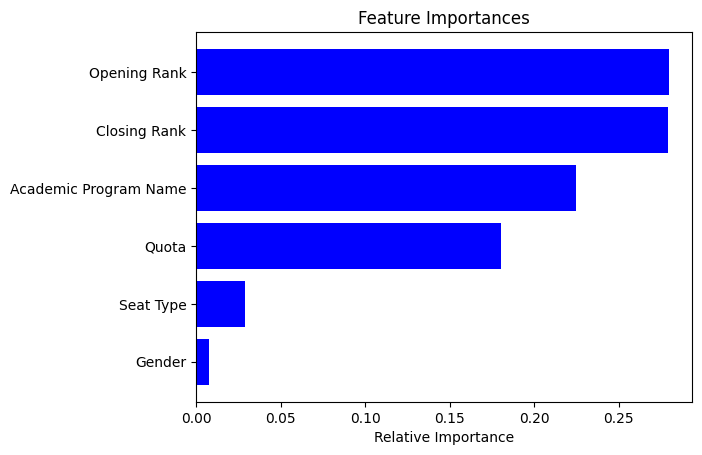

In [19]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
newPerson = [[ 5, 3, 3, 1, 1, 19]]

In [109]:
# custom_input = {
#     'Academic Program Name': 'Computer Science and Engineering (4 Years, Bachelor of Technology))',
#     'Quota': 'AI',
#     'Seat Type': 'OPEN',
#     'Gender': 'Gender Neutral',
#     'Opening Rank': 6969,
#     'Closing Rank': 9892
# }

In [110]:
# encoded_input = {
#     'Academic Program Name': encoder.transform([custom_input['Academic Program Name']]),
#     'Quota': encoder.transform([custom_input['Quota']]),
#     'Seat Type': encoder.transform([custom_input['Seat Type']]),
#     'Gender': encoder.transform([custom_input['Gender']]),
#     'Opening Rank': encoder.transform([custom_input['Opening Rank']]),
#     'Closing Rank': encoder.transform([custom_input['Closing Rank']]),
# }

In [21]:
pred = rf.predict(newPerson)
pred

d:\College-Admission-Prediction-System\myenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([66.59662698])

In [22]:
J = pred[0]

In [26]:
original_label = encoder.inverse_transform([int(J)])
original_label

array(['National Institute of Technology Sikkim'], dtype=object)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# df = pd.read_csv('/content/Round2_JeeMain_Cutoff_2017-2022.csv')

# used this path for my local machine only
df = pd.read_csv('D:\College-Admission-Prediction-System\Round2_JeeMain_Cutoff_2017-2022.csv')

df = df.iloc[:,:7]

df['Gender'].fillna("Gender-Neutral", inplace = True)

X = df.iloc[:,1:]
y = df.iloc[:,0]

cols_to_encode = ['Academic Program Name', 'Quota', 'Seat Type', 'Gender']
encoder = LabelEncoder()
# H = encoder.fit_transform(X[cols_to_encode])
for col in cols_to_encode:
    X[col] = encoder.fit_transform(X[col])

y_label = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.20)

rf = RandomForestRegressor(n_estimators=250,
                           max_features=(2/7), 
                           min_samples_split=5, 
                           n_jobs=2, 
                           random_state=1005)

rf.fit(X_train, y_train)

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

train_mse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_mse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = rf.score(X_train, y_train)
test_r2 = rf.score(X_test, y_test)

print("Train MSE ::", train_mse)
print("Test MSE ::", test_mse)
print("Train R^2 ::", train_r2)
print("Test R^2 ::", test_r2)

newPerson = [[ 5, 3, 3, 1, 1, 19]]
pred = rf.predict(newPerson)

J = pred[0]
original_label = encoder.inverse_transform([int(J)])
original_label

Train MSE :: 11.55963296420009
Test MSE :: 20.166733594113957
Train R^2 :: 0.7766266244050893
Test R^2 :: 0.30183207411527657


d:\College-Admission-Prediction-System\myenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array(['National Institute of Technology, Andhra Pradesh'], dtype=object)